In [ ]:
import urllib3
from urllib3 import *

import time
import pandas as pd

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import spearmanr
import sys
import datetime
import os
import time
import matplotlib.cbook as cbook
import seaborn as sns
import math as mth
from math import exp
import pylab
import pickle
from bs4 import BeautifulSoup
import re
import nltk
import string
import pprint
import sklearn

import bokeh
from bokeh.plotting import *
from collections import OrderedDict
from bokeh.io import output_notebook
from bokeh.models import Toggle, BoxAnnotation, CustomJS, HoverTool

output_notebook()

sns.set_style("white")

%matplotlib inline
#mpl.style.use('ggplot')

from IPython.display import display

from IPython.display import HTML

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [61]:
df1 = pd.read_excel("C:/Users/zanderl/Documents/SPX Decline Study 1.xlsx",sheetname='10')
df2 = pd.read_excel("C:/Users/zanderl/Documents/SPX Decline Study 1.xlsx",sheetname='20')
df3 = pd.read_excel("C:/Users/zanderl/Documents/SPX Decline Study 1.xlsx",sheetname='30')

df1_Trades = pd.read_excel("C:/Users/zanderl/Documents/SPX Decline Study 1.xlsx",sheetname='10 Trades')

In [67]:
df1.index = df1['Symbol']
df1_Trades.index = df1_Trades['Symbol']

In [80]:
df1

,Symbol,Name,Sector,Average Percent Return,Average Absolute Daily Return,Average Daily Return,Average Daily non-holding Return,Average of n Annualized holding periods Volatility,Trade Period Beta with Benchmark,Average Beta Adjusted Return,...,Sharpe Ratio,Simple Excess Trade Return vs S&P 500,% Trades Positive (Simple Excess Return Basis),Sixtieth Percentile of Returns,Standard Deviation of Trade Percent Return,Std Error of Daily Study Period Return (Annualized),Daily Study Period Volatility (Annualized),Study Period Beta with Benchmark,Trade Excess Return vs S&P 500,Twenty-fifth percentile of returns.1
Symbol,,,,,,,,,,,,,,,,,,,,,
COG,COG,Cabot Oil & Gas Corporation,Energy,0.1159,0.0339,0.0110,0.0000,NaN,1.43,0.0789,...,4.37,0.0911,0.8571,0.1572,0.0707,0.0085,0.4624,1.29,0.0801,0.0386
RRC,RRC,Range Resources Corporation,Energy,0.1046,0.0337,0.0100,-0.0011,NaN,1.37,0.0726,...,3.55,0.0814,0.7143,0.1175,0.0908,0.0094,0.5231,1.22,0.0723,0.0454
CXO,CXO,Concho Resources Inc.,Energy,0.1084,0.0342,0.0103,0.0002,NaN,1.50,0.0726,...,3.96,0.0838,1.0000,0.1500,0.0743,0.0082,0.4479,1.44,0.0699,0.0874
UAL,UAL,United Continental Holdings Inc.,Transportation,0.0904,0.0298,0.0087,0.0005,NaN,1.03,0.0558,...,3.88,0.0696,0.7143,0.1680,0.1167,0.0094,0.5260,1.28,0.0554,-0.0406
OKE,OKE,ONEOK Inc.,Public Utilities,0.0801,0.0253,0.0077,0.0004,NaN,1.14,0.0513,...,3.49,0.0540,0.8571,0.0954,0.0493,0.0070,0.3691,1.14,0.0484,0.0337
MNST,MNST,Monster Beverage Corporation,Cons Non-Dur,0.0735,0.0191,0.0071,0.0009,NaN,0.83,0.0509,...,4.43,0.0487,0.7143,0.1141,0.0718,0.0074,0.3923,0.84,0.0507,0.0106
ALK,ALK,Alaska Air Group Inc.,Transportation,0.0832,0.0247,0.0080,0.0008,NaN,1.10,0.0504,...,4.05,0.0589,0.8571,0.1129,0.0787,0.0072,0.3830,1.21,0.0516,0.0134
WMB,WMB,The Williams Companies Inc.,Public Utilities,0.0853,0.0352,0.0082,0.0000,NaN,1.79,0.0488,...,2.36,0.0671,0.5714,0.0639,0.1354,0.0095,0.5319,1.47,0.0453,0.0068
FCX,FCX,Freeport-McMoRan Inc.,Basic Ind,0.0884,0.0416,0.0085,-0.0006,NaN,1.56,0.0469,...,2.58,0.0658,0.7143,0.1685,0.0998,0.0110,0.6418,1.81,0.0413,-0.0127


In [69]:
df1_Trades.head()

,Symbol,Name,Buy Date,Sell Date,Percentage Return,Currency,Buy Price,Sell Price,Cumulative Dividends
Symbol,,,,,,,,,
WMB,WMB,The Williams Companies Inc.,2016-01-13,2016-01-28,41.733973,USD,13.610000,19.289993,0.00
ANDV,ANDV,Andeavor,2011-10-03,2011-10-17,38.440403,USD,18.210007,25.210007,0.00
VLO,VLO,Valero Energy Corporation,2011-10-03,2011-10-17,31.799693,USD,17.169998,22.630005,0.00
RRC,RRC,Range Resources Corporation,2011-10-03,2011-10-17,30.904524,USD,55.720001,72.940002,0.00
AYI,AYI,Acuity Brands Inc.,2011-10-03,2011-10-17,30.085358,USD,33.970001,44.059998,0.13


In [39]:
#df1.columns
for i in df1.columns:
    print(''.join(i))

Symbol
Name
Sector
Average Percent Return
Average Absolute Daily Return
Average Daily Return
Average Daily non-holding Return
Average of n Annualized holding periods Volatility
Trade Period Beta with Benchmark
Average Beta Adjusted Return
Average Absolute Daily Beta Adjusted Return
Average Daily Beta Adjusted Return
Average Daily non-holding Beta Adjusted Return
Average of n Annualized holding periods Volatility (Beta Adjusted)
Cumulative Beta Adjusted Return
Std Error of Daily Holding Period Beta Adjusted Return (Annualized)
Daily Holding Period Volatility (Annualized) (Beta Adjusted)
Best Beta Adjusted Return
Average Absolute Beta Adjusted Return
Average Daily Beta Adjusted Return of Study Period
Median Beta Adjusted Return
Median Absolute Beta Adjusted Return
Median Daily Beta Adjusted Return
Worst Beta Adjusted Return
Percent of Trades Negative (Beta Adjusted)
Number of Days Positive (Beta Adjusted)
Percent of Days Positive (Beta Adjusted)
Percent of Trades Positive (Beta Adjusted)

In [70]:
df1_Trades['Percentage Return'].sum()

9935.585051408852

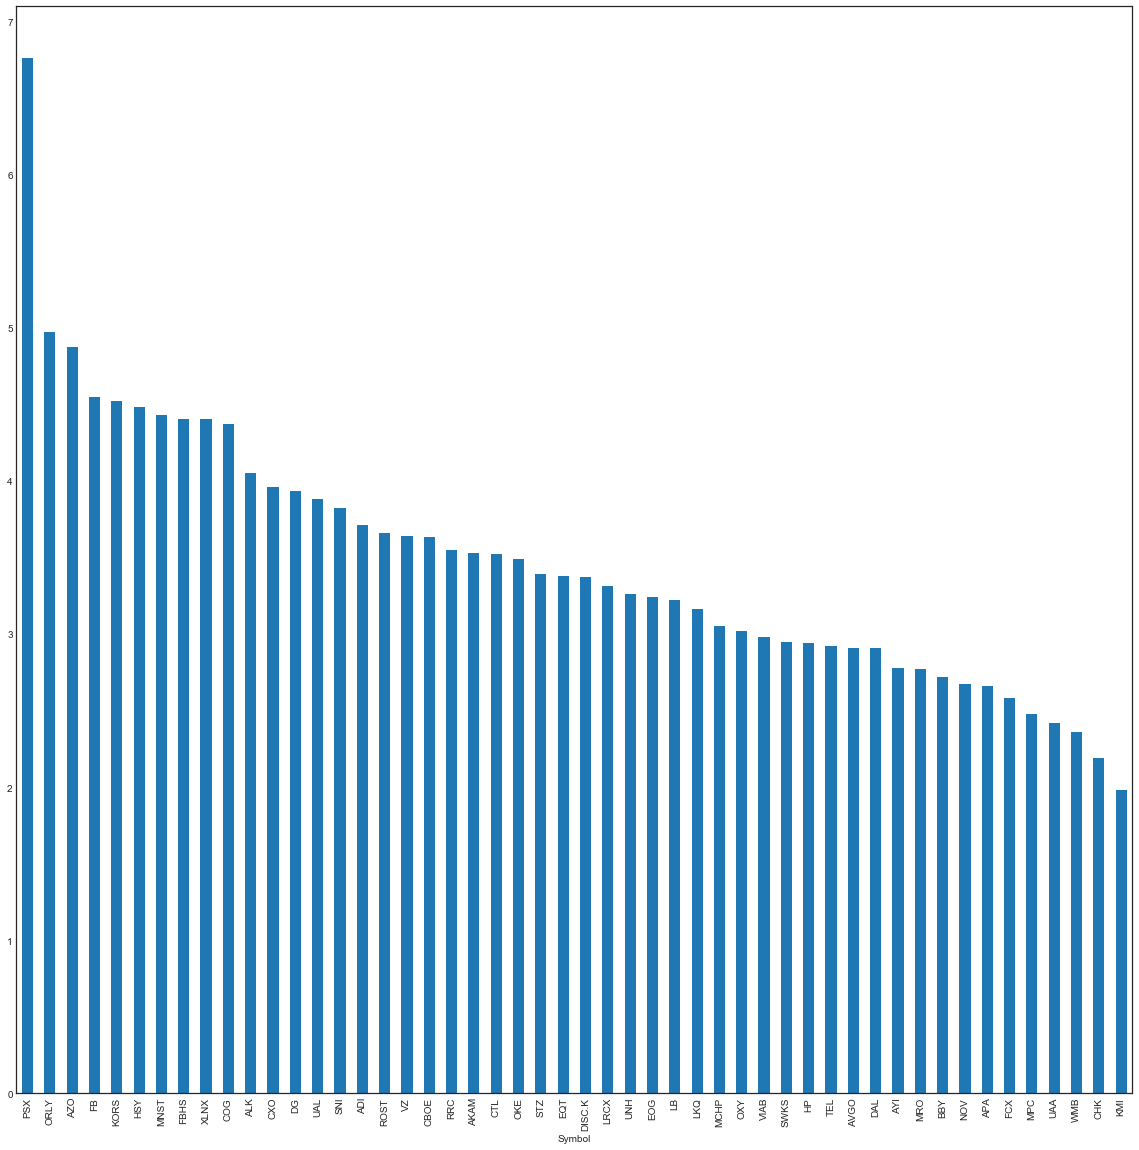

In [21]:
f, ax = plt.subplots(figsize=(20,20))


df1['Sharpe Ratio'][:50].sort_values(ascending=False).plot(kind='bar',ax=ax)

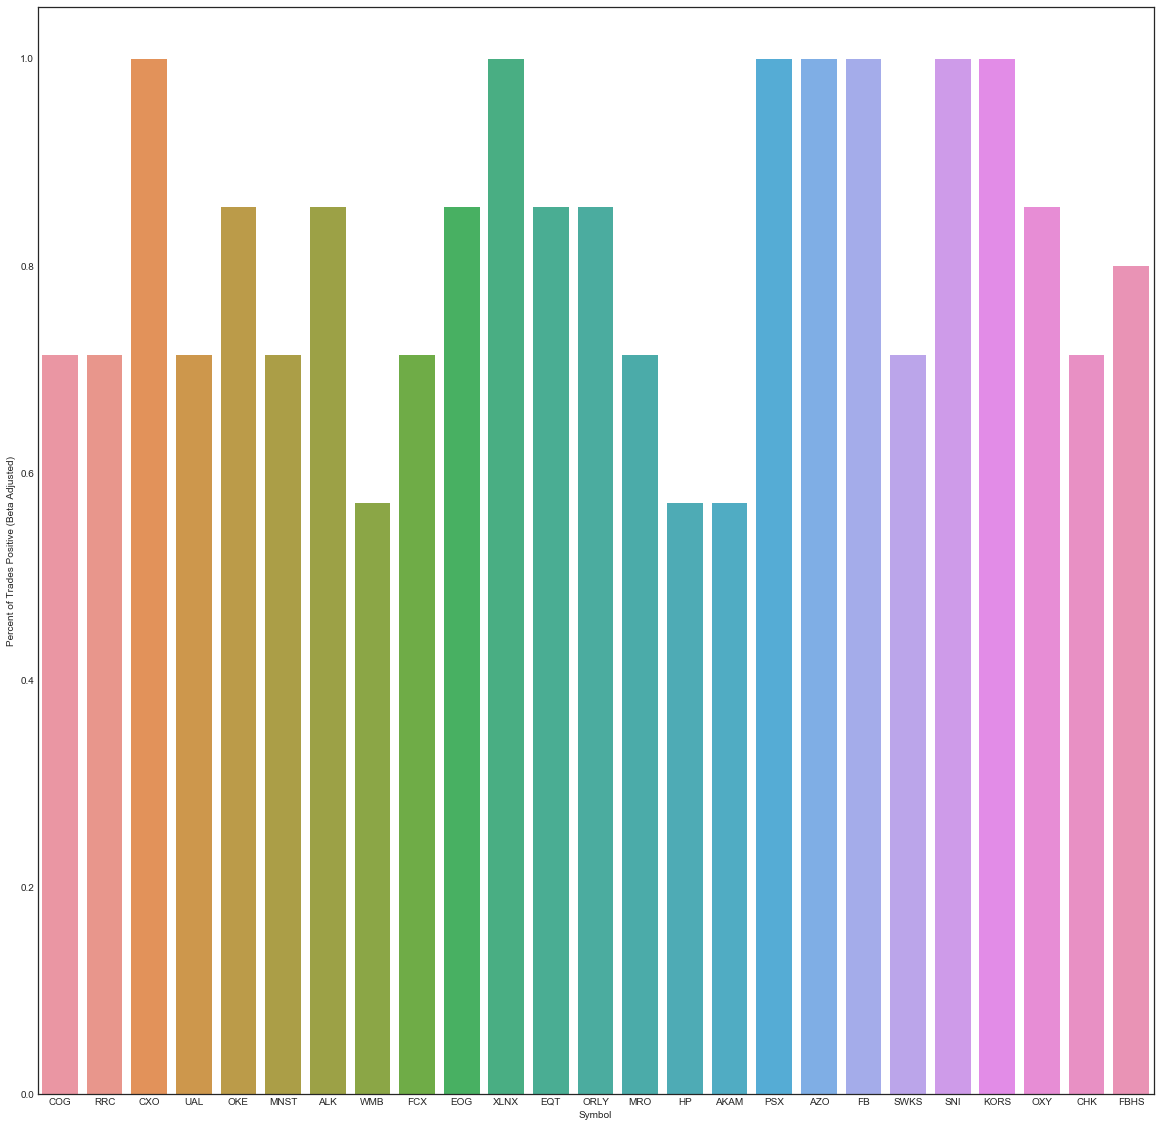

In [36]:
f, ax = plt.subplots(figsize=(20,20))


sns.barplot(x=df1.index[:25], y=df1['Percent of Trades Positive (Beta Adjusted)'][:25],ax=ax)

In [40]:
df1['trade weighted returns'] = df1['Percent of Trades Positive (Beta Adjusted)'] / df1['Number of Trades']

In [42]:
#df1['trade weighted returns']

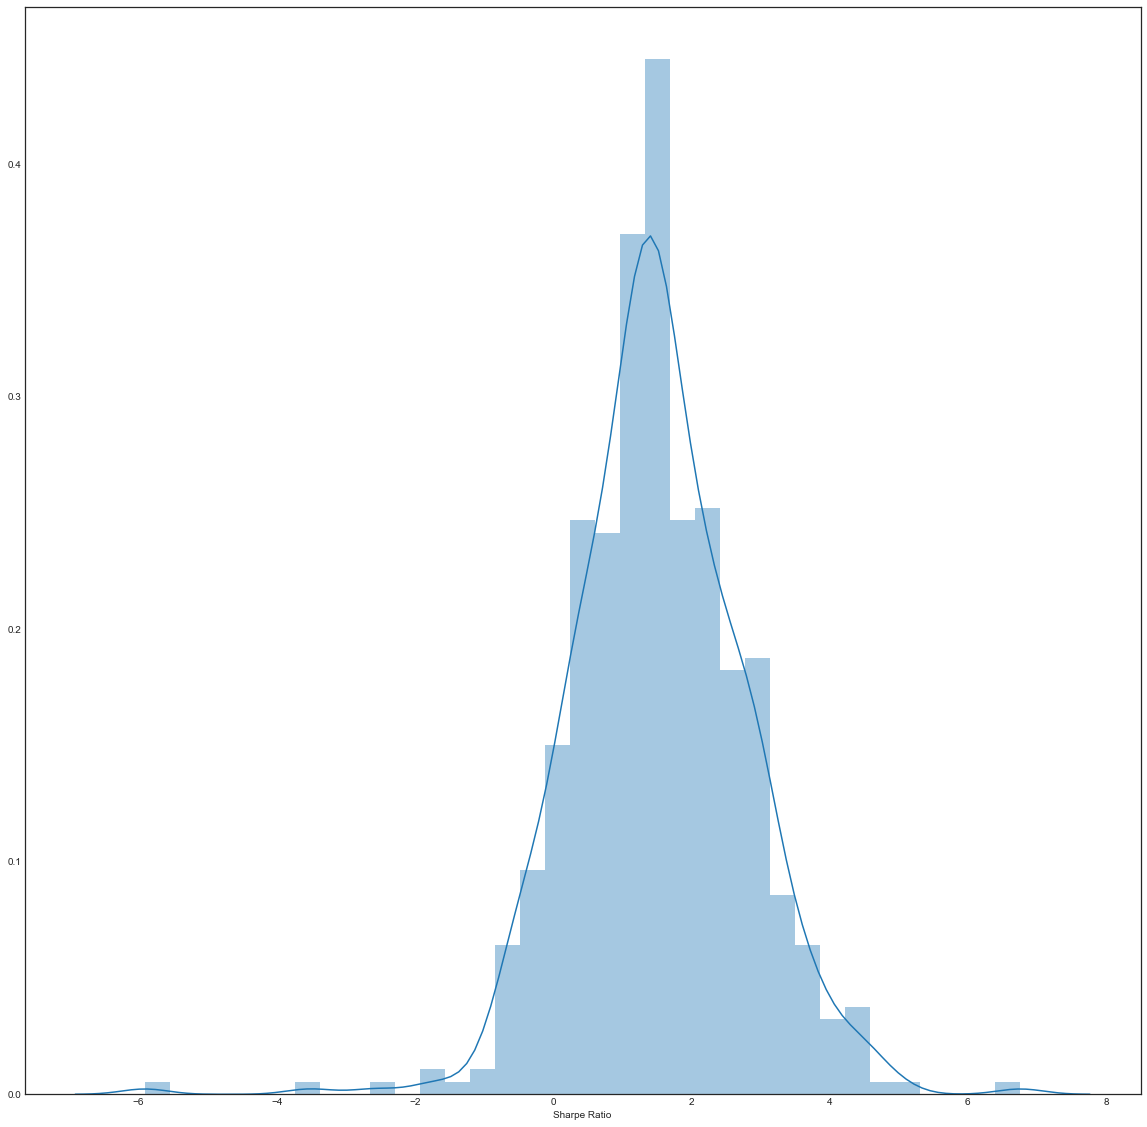

In [47]:
f, ax = plt.subplots(figsize=(20,20))

sns.distplot(a=df1['Sharpe Ratio'],ax=ax)

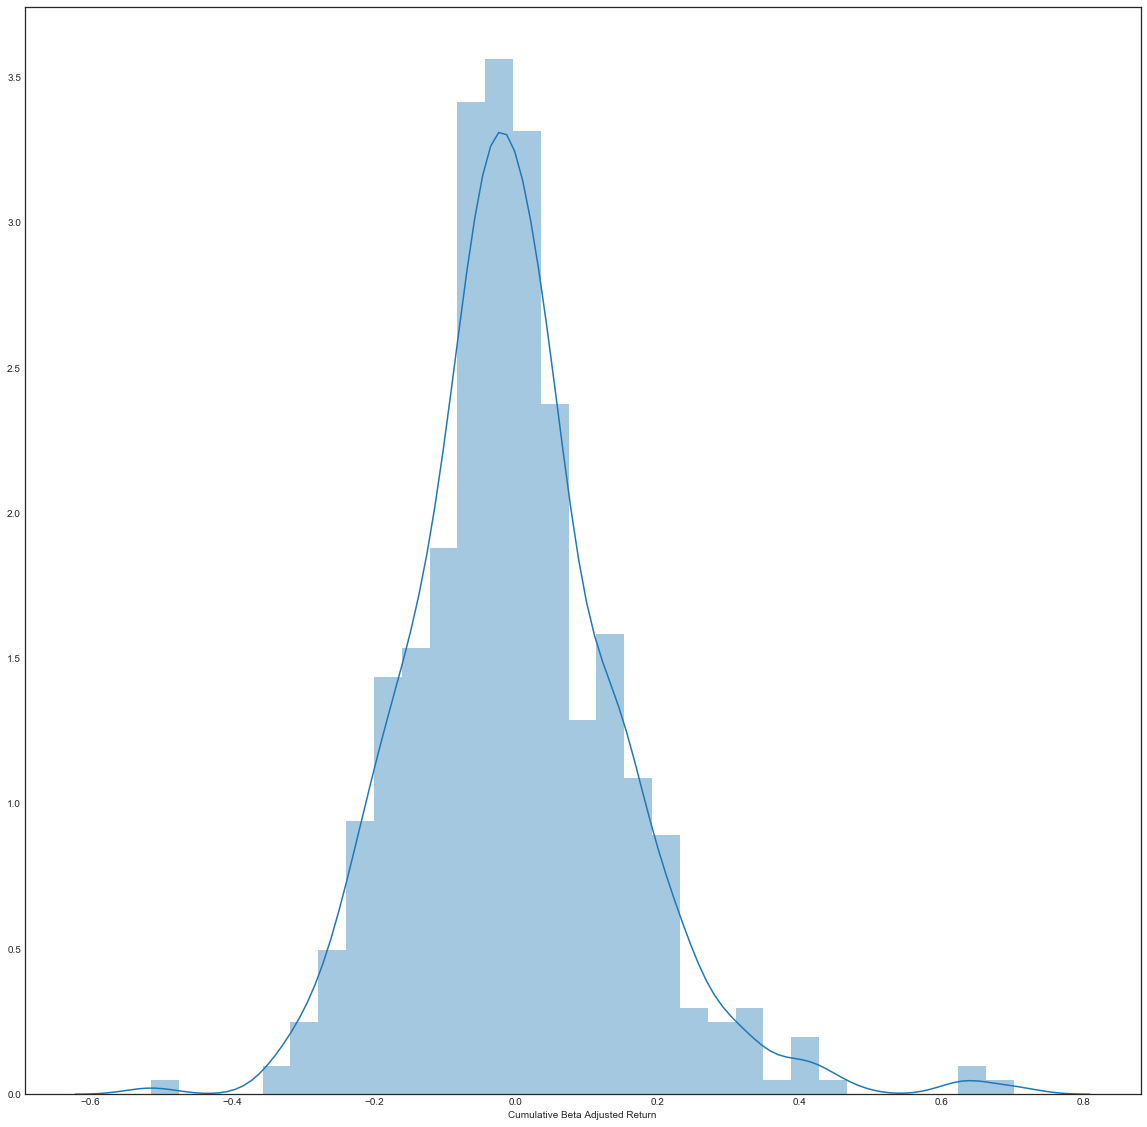

In [49]:
f, ax = plt.subplots(figsize=(20,20))

sns.distplot(a=df1['Cumulative Beta Adjusted Return'],ax=ax)

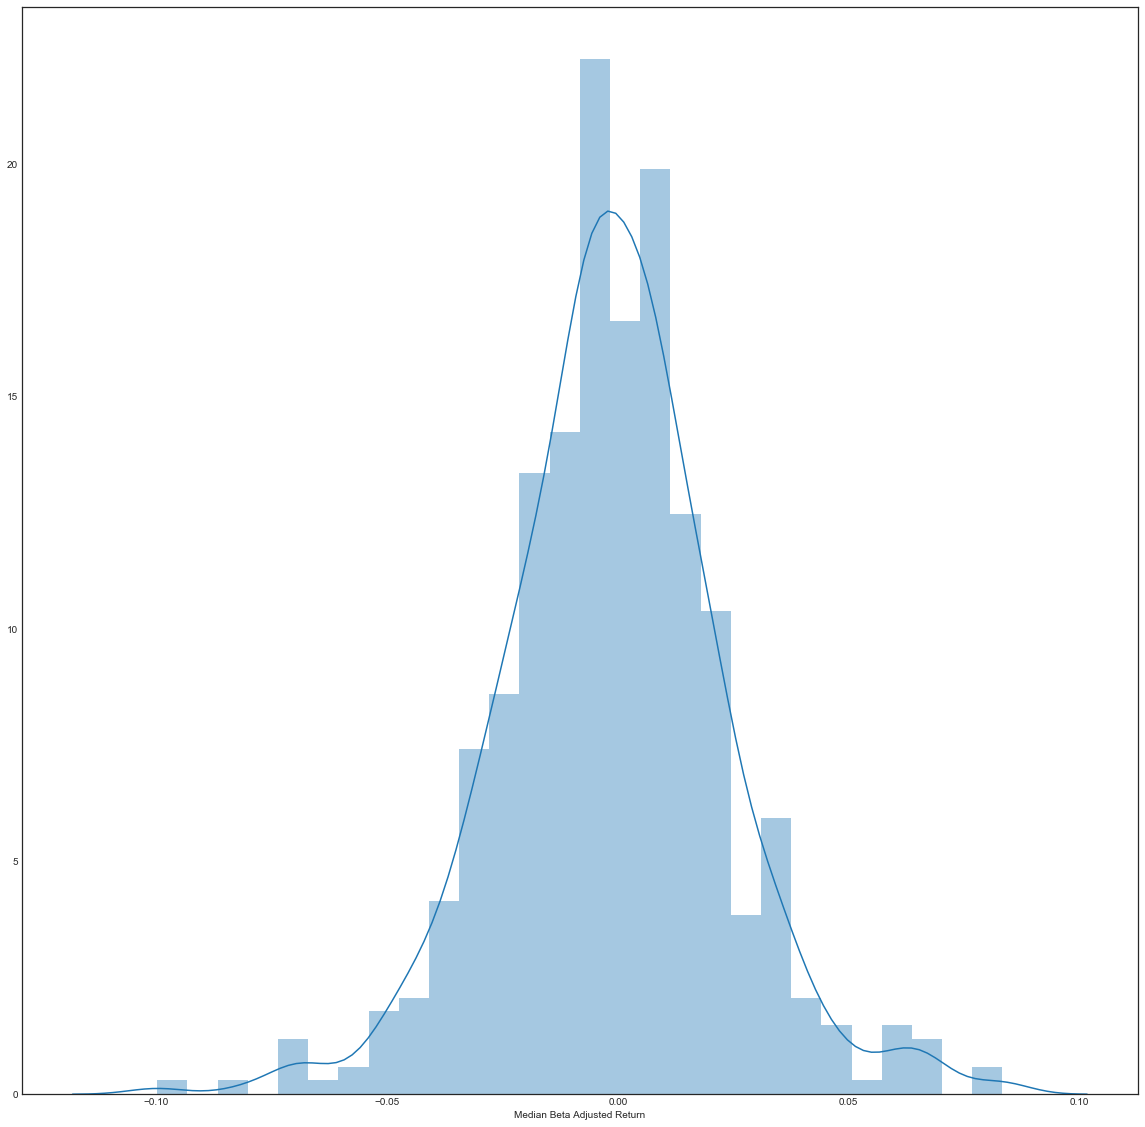

In [50]:
f, ax = plt.subplots(figsize=(20,20))

sns.distplot(a=df1['Median Beta Adjusted Return'],ax=ax)

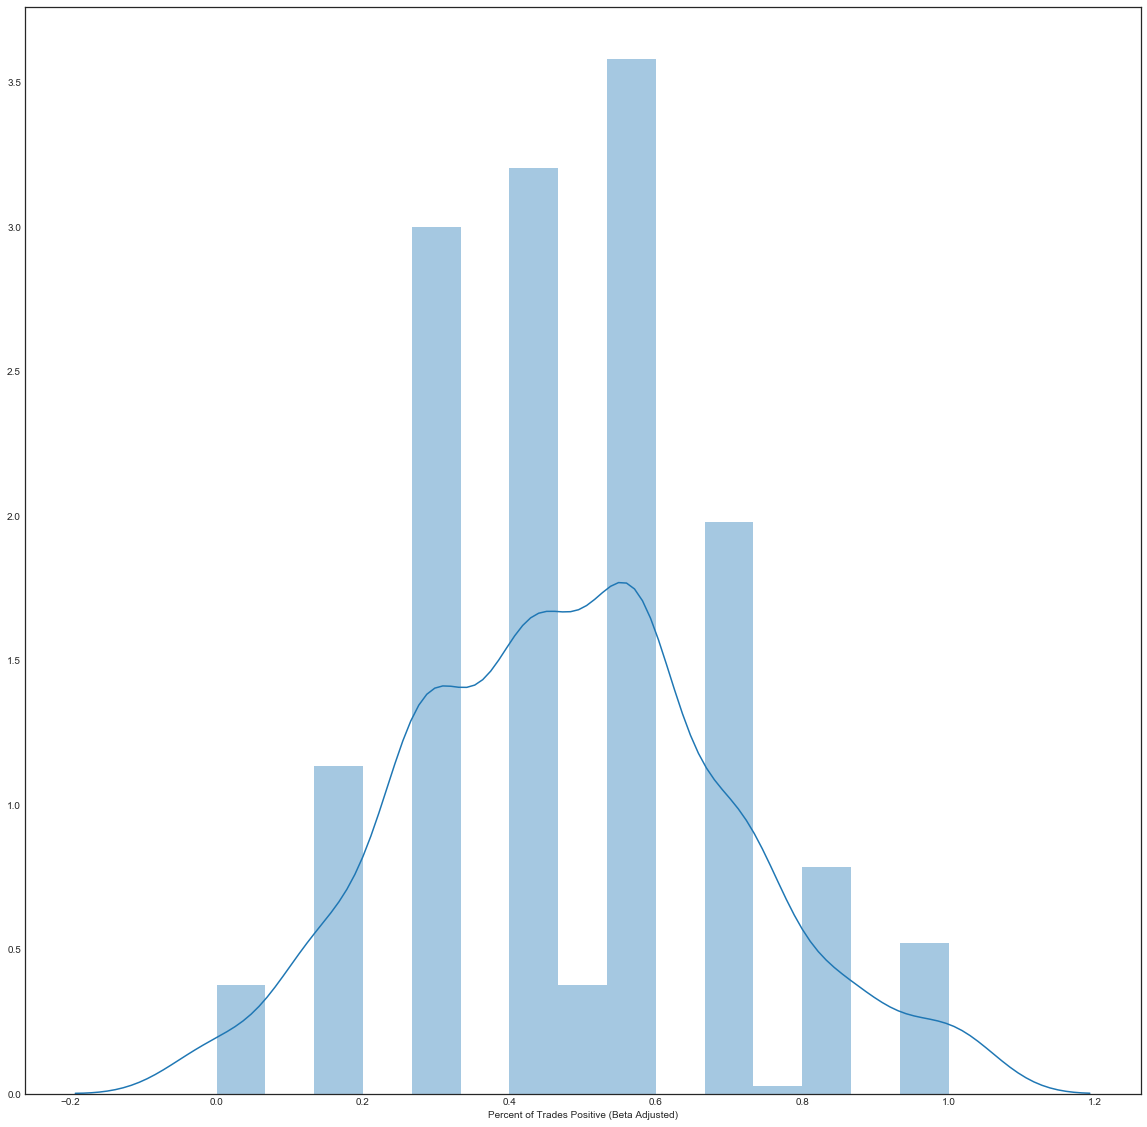

In [60]:
f, ax = plt.subplots(figsize=(20,20))

sns.distplot(a=df1['Percent of Trades Positive (Beta Adjusted)'],ax=ax)

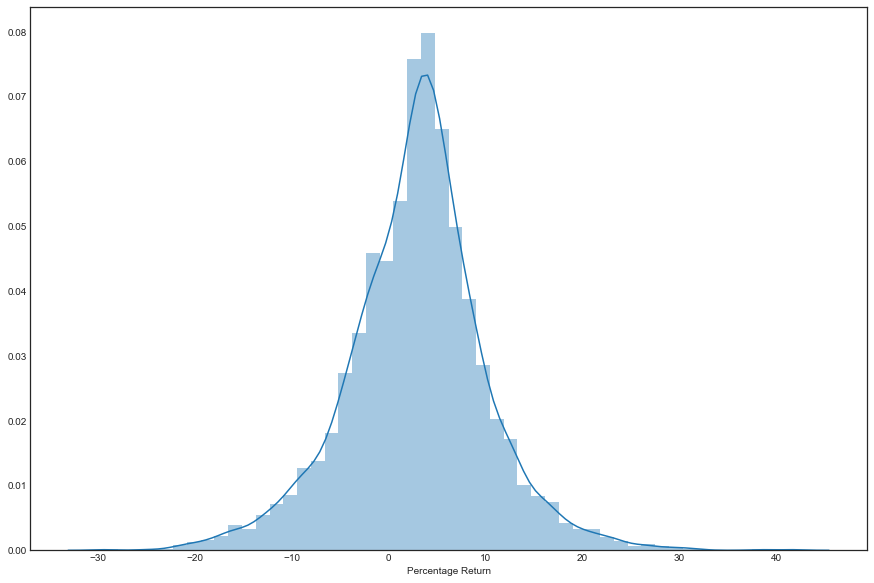

In [78]:
f, ax = plt.subplots(figsize=(15,10))

sns.distplot(a=df1_Trades['Percentage Return'], ax=ax)

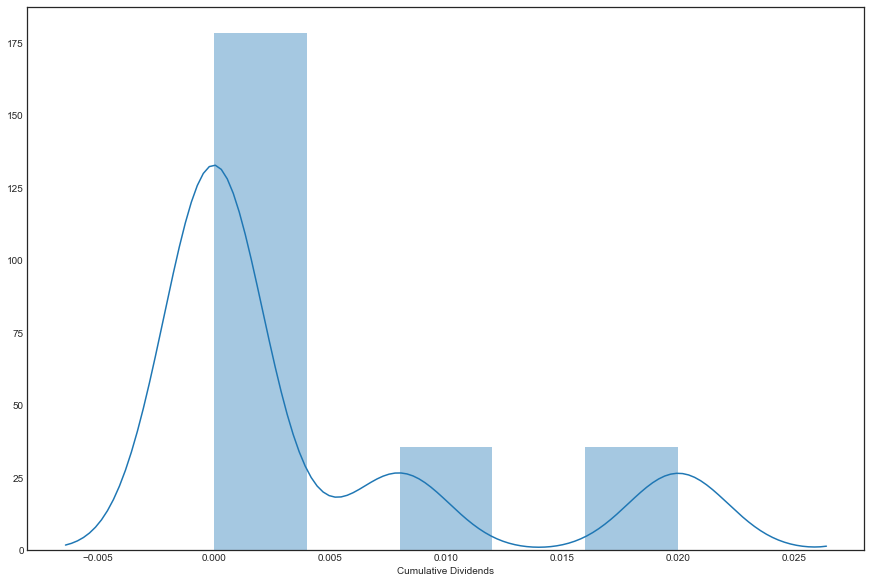

In [81]:
f, ax = plt.subplots(figsize=(15,10))

sns.distplot(a=df1_Trades['Cumulative Dividends'].loc['COG'], ax=ax)

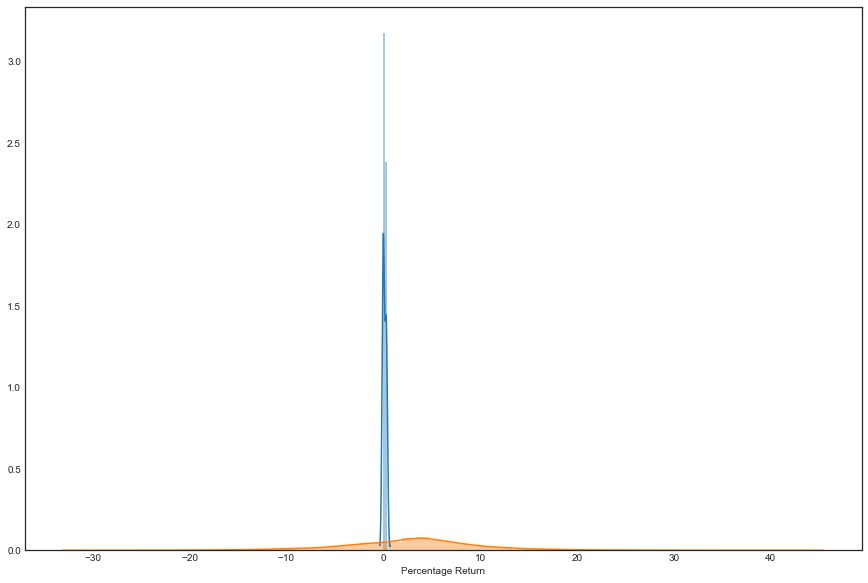

In [94]:
f, ax = plt.subplots(figsize=(15,10))

sns.distplot(a=df1_Trades['Cumulative Dividends'].loc['RJR'], ax=ax)
#sns.distplot(a=df1_Trades['Cumulative Dividends'].loc['OKE'], ax=ax)
sns.distplot(a=df1_Trades['Percentage Return'], ax=ax,label='Population percentage return')